<a href="https://colab.research.google.com/github/glamacles/downs_project/blob/main/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firedrake Install

In [1]:
import os
arch = os.getenv("ARGS", "real")

try:
    import google.colab  # noqa: F401
except ImportError:
    import firedrake as fd
else:
    try:
        import firedrake as fd
    except ImportError:
        if arch != "complex":
            !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
        else:
            !wget "https://fem-on-colab.github.io/releases/firedrake-install-complex.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
        import firedrake as fd

# Clone project repo and mount Google Drive

In [5]:
!git clone https://github.com/glamacles/downs_project
from google.colab import drive
drive.mount('/content/drive')

fatal: destination path 'downs_project' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd downs_project

/content/downs_project


# Introduction
- In this project you will create an emulator to predict ice flow velocity for synthetic ice sheets with bumpy beds
- We'll use a simplified implementation of SpecEIS that uses CG1 elements for all velocity components
- We'll use a regular mesh to simplify mapping between Firedrake and Pytorch
- And we'll use a Fourier Neural Operator as our NN architecture

9999999999.999685


/usr/local/lib/python3.10/dist-packages/firedrake/interpolation.py:385: FutureWarning: The use of `interpolate` to perform the numerical interpolation is deprecated.
This feature will be removed very shortly.

Instead, import `interpolate` from the `firedrake.__future__` module to update
the interpolation's behaviour to return the symbolic `ufl.Interpolate` object associated
with this interpolation.

You can then assemble the resulting object to get the interpolated quantity
of interest. For example,

```
from firedrake.__future__ import interpolate
...

assemble(interpolate(expr, V))
```

Alternatively, you can also perform other symbolic operations on the interpolation operator, such as taking
the derivative, and then assemble the resulting form.

  warnings.warn("""The use of `interpolate` to perform the numerical interpolation is deprecated.
/usr/local/lib/python3.10/dist-packages/firedrake/interpolation.py:385: FutureWarning: The use of `interpolate` to perform the numerical inter

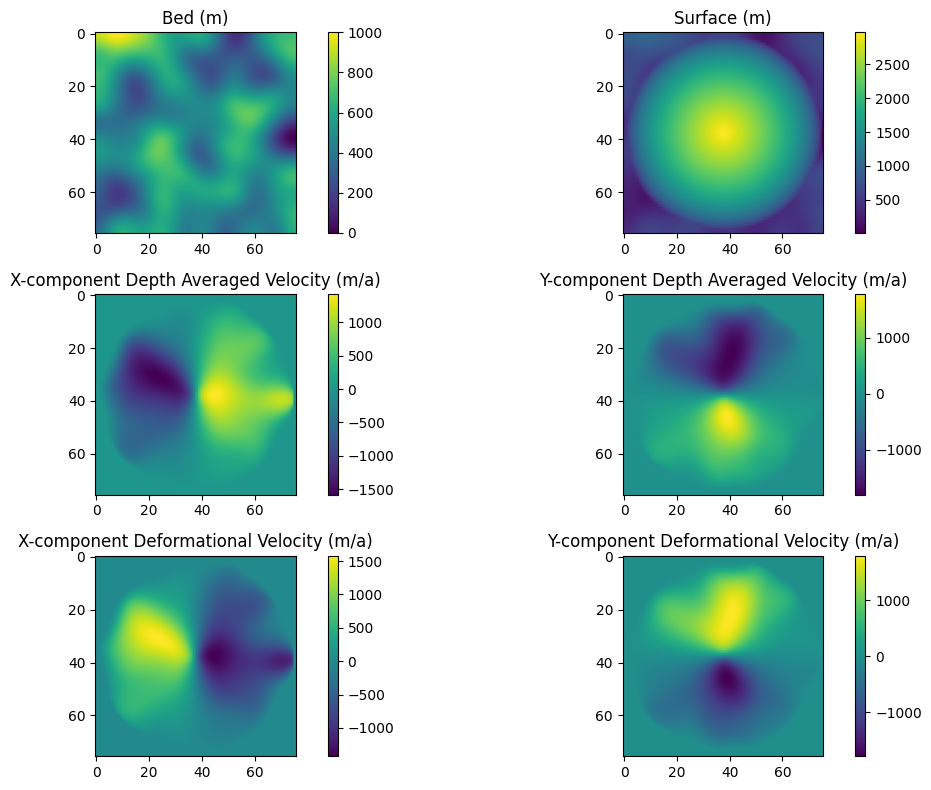

In [4]:
import os
import sys
import matplotlib.pyplot as plt
os.environ['OMP_NUM_THREADS'] = '1'
sys.path.append('model/')

import firedrake as fd
from model import SpecFO

# Model defaults to a 125 x 125 km domain with 1.25 km res
model = SpecFO()

# Generate random ice sheet geometry
B, H = model.get_geometry(
    B0 = 1000.,
    S0 = 3000,
)

# Solve for velocity
model.set_field(model.B, B)
model.set_field(model.H, H)
model.solver.solve()


ubar0 = model.get_field(model.U.sub(0))
ubar1 = model.get_field(model.U.sub(1))
udef0 = model.get_field(model.U.sub(2))
udef1 = model.get_field(model.U.sub(3))


plt.figure(figsize=(12,8))
plt.subplot(3, 2, 1)
plt.title('Bed (m)')
plt.imshow(B)
plt.colorbar()

plt.subplot(3, 2, 2)
plt.title('Surface (m)')
plt.imshow(B+H)
plt.colorbar()

plt.subplot(3,2,3)
plt.title('X-component Depth Averaged Velocity (m/a)')
plt.imshow(ubar0)
plt.colorbar()

plt.subplot(3,2,4)
plt.title('Y-component Depth Averaged Velocity (m/a)')
plt.imshow(ubar1)
plt.colorbar()

plt.subplot(3,2,5)
plt.title('X-component Deformational Velocity (m/a)')
plt.imshow(udef0)
plt.colorbar()

plt.subplot(3,2,6)
plt.title('Y-component Deformational Velocity (m/a)')
plt.imshow(udef1)
plt.colorbar()

plt.tight_layout()
plt.show()